## 3.3 kMeans

### k-Means Clustering
* k 평균 군집화 알고리즘, 비지도 학습
* 뒤섞여 있는 데이타를 원하는 갯수로 군집화
* 알고리즘 (2개로 군집화하는 경우)
* $ \displaystyle minize[ J = \sum_{All Red_Points} distance(C1, Red_Point) + \sum_{All Blue_Points} distance(C2, Blue_Point)] $

#### Step 1.
* 2개로 군집화 하는 경우
* 랜덤하게 2개의 중앙점(C1, C2)를 정한다.
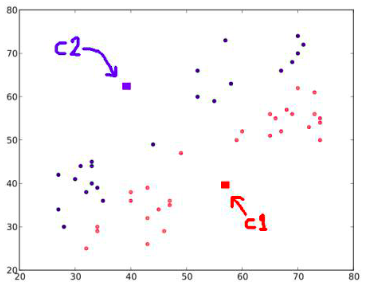

#### Step2.
* 두 중앙점에서 각 점의 거리를 구한다.
* C1에 더 가까운 점은 0으로 표시
* C2에 더 가까운 점은 1로 표시

#### Step 3. 
* 0과 1로 표시된 점들의 평균을 내어 새로운 C1, C2 선정

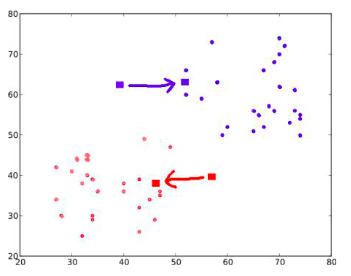


#### Step 4.
* C1, C2가 고정될 때 까지 Step 2~3 반복
* 각 중앙점은 각 데이타의 거리의 합이 가장 적은 점을 의미
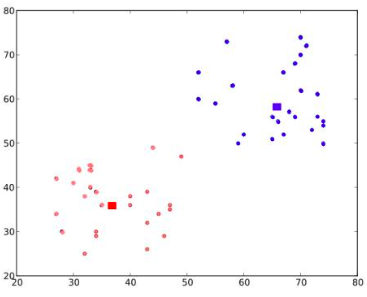

#### 난수 군집화 예제
* sklearn.cluster.KMeans(n_clusters=K)

In [1]:
%matplotlib inline

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[195.08002 192.6    ]
 [ 60.56002  61.64   ]]


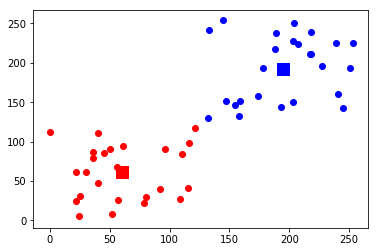

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

x = np.random.randint(0,125,(25,2))
y = np.random.randint(125, 255,(25,2))
data = np.vstack((x,y)).astype(np.float32)

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
print(kmeans.predict(data))
label = kmeans.labels_
print(label)
center =  kmeans.cluster_centers_
print(center)


blue = data[label.ravel()==0]
red = data[label.ravel()==1]
plt.scatter(blue[:,0],blue[:,1], c='b')
plt.scatter(red[:,0],red[:,1], c='r')

plt.scatter(center[0,0],center[0,1],s=150, c='b', marker='s')
plt.scatter(center[1,0],center[1,1],s=150, c='r', marker='s')
plt.show()

#### 컬러 8 군집화 예제

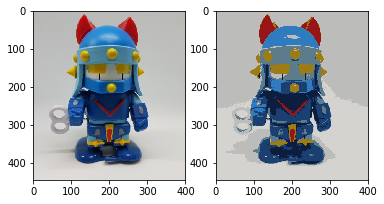

In [7]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import cv2

K = 8 # 군집화 개수(8컬러) 
img = cv2.imread('./img/tkv.jpg')
data = img.reshape((-1,3)).astype(np.float32)

kmeans = KMeans(n_clusters=K)
kmeans.fit(data)
label = kmeans.labels_
center =  kmeans.cluster_centers_
center = np.uint8(center)
res = center[label.flatten()]
res = res.reshape((img.shape))
plt.subplot(1,2,1)
plt.imshow(img[:,:,::-1])
plt.subplot(1,2,2)
plt.imshow(res[:,:,::-1])


#### 손글씨 숫자 군집화 예제

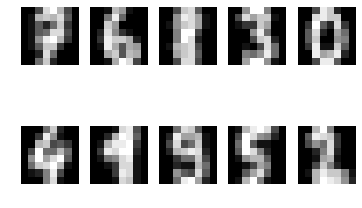

In [8]:
import cv2, numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans

digits = load_digits()

K = 10
kmeans = KMeans(n_clusters=K)
kmeans.fit(digits.data)
label = kmeans.labels_
center =  kmeans.cluster_centers_

for i in range(10):
    cent_img = center[i].reshape(8,8).astype(np.uint8)
    plt.subplot(2,5, i+1)
    plt.imshow(cent_img, 'gray')
    plt.axis('off')
plt.show()
